In [1]:
import numpy as np
from bandits import *
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
algorithm = {
    'simple' : SimpleBanditAlgorithm(10, 0.01),
    'optimistic' : OptimisticBanditAlgorithm(10, 5.0, 0.01),
    'ucb' : UCBBanditAlgorithm(10, 2.0, 0.01),
    'gradient' : GradientBanditAlgorithm(10, 0.2, 0.01)
}

problem = BanditProblem(algorithm)

best_idx = np.argmax(problem.problem.mean_rewards)
best_val = problem.problem.mean_rewards[best_idx]

print("Optimal action = {}".format(best_idx))
print("Best possible reward = {}".format(best_val))

Optimal action = 8
Best possible reward = 1.177165623676392


In [3]:
problem.multirun()
mean_rewards = {k : np.mean(problem.history[k], axis=0) for k in problem.algorithm}

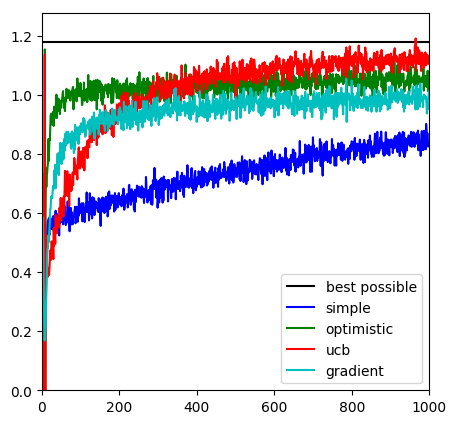

In [4]:
colors = ['b', 'g', 'r', 'c']
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.axhline(best_val, c='k', label="best possible")
ax.set_xlim([0,1000])
ax.set_ylim([0, best_val+0.1])

ax.plot(range(1000), mean_rewards['simple'], c = colors[0], label="simple")
ax.plot(range(1000), mean_rewards['optimistic'], c = colors[1], label="optimistic")
ax.plot(range(1000), mean_rewards['ucb'], c = colors[2], label="ucb")
ax.plot(range(1000), mean_rewards['gradient'], c = colors[3], label="gradient")
ax.legend()